 wget --recursive --no-parent https://tavern.osome.iu.edu/jobs/2023-05-04/

In [1]:
path = '../data/twitter-iu/2023-05-04/tweetContent'

In [9]:
!python -m pip install -U matplotlib

                                              0.0/7.6 MB ? eta -:--:--
     -                                        0.2/7.6 MB 4.8 MB/s eta 0:00:02
     --------                                 1.6/7.6 MB 16.4 MB/s eta 0:00:01
     ---------------------                    4.1/7.6 MB 29.3 MB/s eta 0:00:01
     --------------------------               5.1/7.6 MB 29.6 MB/s eta 0:00:01
     -----------------------------------      6.8/7.6 MB 29.0 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 27.1 MB/s eta 0:00:00
                                              0.0/163.0 kB ? eta -:--:--
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
                                              0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 1.0/1.0 MB 32.3 MB/s eta 0:00:00
                                              0.0/55.4 kB ? eta -:--:--
  

In [16]:
import glob
import gzip
import json
import pandas as pd

from  datetime import date
from email.utils import parsedate_tz
from datetime import datetime, timedelta


In [3]:
path = '../data/twitter-iu/2023-05-04/tweetContent/'
files = glob.glob(path + '/*.gz')
print(files[:10])

['../data/twitter-iu/2023-05-04/tweetContent\\part-m-00000.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00001.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00002.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00003.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00004.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00005.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00006.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00007.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00008.gz', '../data/twitter-iu/2023-05-04/tweetContent\\part-m-00009.gz']


In [4]:
'''
for file in files: 
    with gzip.open(file, mode='rb') as f:
        file_content = f.read().decode("utf-8") 
        
        outfile = open(file[:-3] + '.txt', 'w', encoding='utf-8')
        outfile.write(file_content)
        outfile.close()
'''

'\nfor file in files: \n    with gzip.open(file, mode=\'rb\') as f:\n        file_content = f.read().decode("utf-8") \n        \n        outfile = open(file[:-3] + \'.txt\', \'w\', encoding=\'utf-8\')\n        outfile.write(file_content)\n        outfile.close()\n'

In [7]:
tweets = []
unique_users = set()
for file in files:
    file_txt = file[:-3] + '.txt'
    for line in open(file_txt, 'r', encoding='utf-8'):
        tweet = json.loads(line)
        user_id = tweet['user']['screen_name']
        #tweets.append(tweet)
        unique_users.add(user_id)

# unique users + aqueles que deram errado + passar os demais pro kuno

In [ ]:
unique_users = set()
for tweet in tweets:
    user = tweet['user']['id_str']
    unique_users.add(user)
    
print(len(unique_users))

In [27]:
all_users = pd.read_csv('../data/valid_twitter_handles_2023-06-06_complete.txt', sep='\t', header=None)

print(all_users.head())

all_users = set([handler[1:] for handler in all_users[0].values])

               0
0       @anaivas
1     @agarregui
2       @Annet81
3  @Anthrobirder
4     @anthroetc


In [28]:
missing = all_users - unique_users
print(missing)
print(len(missing))

{'arthijayaraman', 'arozenshtein', 'smurphstweets', 'CharlRWalker', 'philsolis', 'cassandrafree17', 'vickstar79', 'SilversteinProf', 'mosuleye', 'conchagn', 'lankian', 'benforado', 'NKennedyNeil', 'kevinlevin', 'griomanjen', 'wendylyon', 'cjslaby', 'Austinburkeswx', 'c_brandtner', 'boardman_claire', 'cliffordcolby', 'c_caseys', 'JamesHumbers', 'alanyliu', '_sarahannadams', 'RaffaellaRosina', 'aditi_muses', 'sarahcrgr', 'katmckatniss', 'noaasm_', 'navermuseum', 'oliejd', 'ioantrifu', 'clolecoz', 'robheverly', 'toriaclaire', 'GeoffRockwell', 'donovantann', 'akqmet5', 'NickPoole1', 'chriskridler', 'AlexSanz', 'johandewittnl', '_k_crosby_', 'pazjimenez', 'WhiteheadKrista', 'vss31', 'jenniebatchelor', 'preetiraghunath', 'mannegerell', 'rossa', 'ISayIAmWoman', 'No_Little_Plans', 'DerGuenther', 'kvhuntley', 'nicknoltewx', 'lexlanham', 'JohannesSkov', 'herzldad', 'poisonchallis', 'jennystephens52', 'JustinMCarville', 'netopiaEU', 'redegelde', 'yezitried', 'Jgob', 'glycojones', 'Kasselimnetz', 

In [29]:
today = date.today()
missing_profiles = open('../data/twitter_handles_missing_{}.txt'.format(today), 'w', encoding='utf-8')
for handler in missing:
    missing_profiles.write("{}\n".format(handler))
missing_profiles.close()


In [5]:
mastodon_topic = []
for tweet in tweets:
    text = tweet['text'].lower()
    if 'mastodon' in text:
        created_at = tweet['created_at']
        user = tweet['user']
        mastodon_topic.append((text, created_at, user))



In [6]:
len(mastodon_topic)

3526

In [20]:
def to_datetime(datestring):
    time_tuple = parsedate_tz(datestring.strip())
    dt = datetime(*time_tuple[:6])
    return dt - timedelta(seconds=time_tuple[-1])

x = []
for tweet in mastodon_topic:
    d = to_datetime(tweet[1])
    month = d.month 
    year = d.year
    week = d.day // 7
    x.append("{}-{}-{}".format(year, month, week))


In [21]:
len(x)

3526

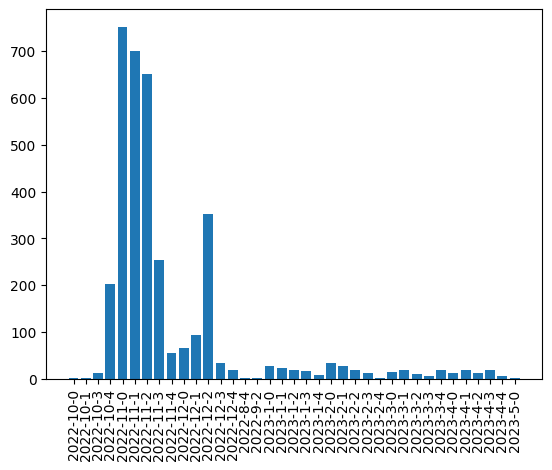

In [24]:
import numpy as np
import matplotlib.pyplot as plt

u, c = np.unique(x, return_counts=True)

_ = plt.bar(u, c)
_ = plt.xticks(rotation=90)